In [32]:
import json

# JSON 파일 로드
with open('name1.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

# JSON 데이터에서 텍스트 추출 (예제에서는 데이터가 텍스트의 배열이라고 가정)
texts = data # 만약 데이터가 딕셔너리 내의 특정 키에 텍스트 배열을 포함하고 있다면, 적절한 키로 접근해야 합니다.

# 리스트의 모든 텍스트를 하나의 문자열로 결합
combined_text = " ".join(texts)

In [13]:
!pip install konlpy

In [14]:
from konlpy.tag import * 

# 영어 nlp
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# 시각화 관련
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from collections import Counter
from PIL import Image

# 기타
from tqdm import tqdm_notebook, tqdm 

In [33]:
import pandas as pd

data = pd.DataFrame(texts, columns=['text'])

In [35]:
data['text'] = data['text'].str.replace('[^가-힣]', ' ', regex = True)
data['text'] = data['text'].apply(lambda x : x.split('(')[0])

In [36]:
data

,text
0,비료제조법
1,부유정광 저기 처리및광립심강속성법
2,저온도광액에대한부유선광법
3,제지용섬유등속처리기
4,사진인화지제조법
...,...
268907,살균기능을 갖는 가발 거치대 ...
268908,단 로터리 베인 진공 펌프 케이싱 ...
268909,부압 부스팅 메쉬 커버 및 전기식 팬 모기채 ...
268910,슬라이딩 베인 펌프


In [75]:
data.to_csv('wc_title.csv', encoding='utf-8')

AttributeError: 'dict' object has no attribute 'to_csv'

In [97]:
data = pd.read_csv('wc_title_cleaned.csv', encoding='utf-8')
data = data[data['count'] > 5]
data = dict(zip(data['word'].tolist(), data['count'].tolist()))

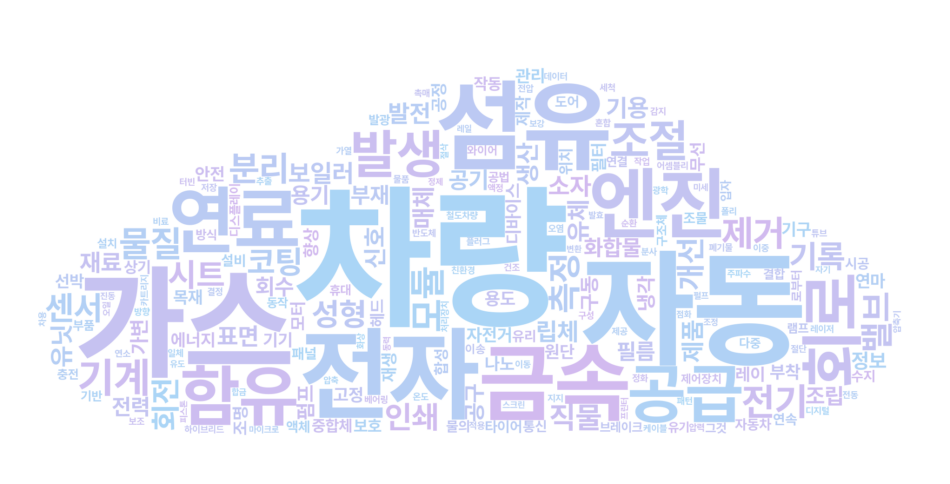

In [98]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
from PIL import Image
import json

colors = ["#a9d6f6", "#d2baef"]

# text = combined_text

cmap = LinearSegmentedColormap.from_list("custom_gradient", colors)

mask = np.array(Image.open("cloud.png"))

data.pop('방법')
data.pop('장치')
data.pop('시스템')
data.pop('이용')
data.pop('포함')
data.pop('이의')
data.pop('제조')
data.pop('구비')
data.pop('사용')
data.pop('처리')
data.pop('제어')
data.pop('조성')
data.pop('구조')
data.pop('기능')
data.pop('가공')
data.pop('방지')
data.pop('형성')
data.pop('표시')
data.pop('복합')


font_path = 'Pretendard-Bold.ttf'

wordcloud = WordCloud(background_color="white",
                      max_words=200,
                      mask=mask,
                      colormap=cmap,
                      stopwords=stopwords,
                      collocations=False,
                      font_path=font_path).generate_from_frequencies(data)


plt.figure(figsize=(12, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

wordcloud.to_file("output.png")
